In [1]:
# Importing the important packages:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the marketing dataframe:
market_df = pd.read_csv('Marketing_data.csv')
market_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### MINIMUM_PAYMENTS and CREDIT_LIMIT are the columns that has null values.

In [4]:
# Compute the the number of null value vales in the MINIMUM_PAYMENTS column:
market_df.MINIMUM_PAYMENTS.isnull().sum()

313

In [5]:
# compute the average of the MINIMUM_PAYMENT:
mean_mp = market_df['MINIMUM_PAYMENTS'].mean()
mean_credit = market_df['CREDIT_LIMIT'].mean()

In [6]:
market_df.MINIMUM_PAYMENTS.fillna(mean_mp, inplace=True)
market_df.CREDIT_LIMIT.fillna(mean_credit, inplace=True)

In [7]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
# Check the dtaframe for duplicated values:
market_df.duplicated().sum()

0

In [9]:
market_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Mean balance is $$1564. 
### Balance frequency is frequently updated on average 0.9
### Purchases average is $1000
### one off purchase average is $600
### Average purchases frequency is around 0.5
### average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
### Average credit limit ~ 4500
### Percent of full payment is 15%
### Average tenure is 11 years

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

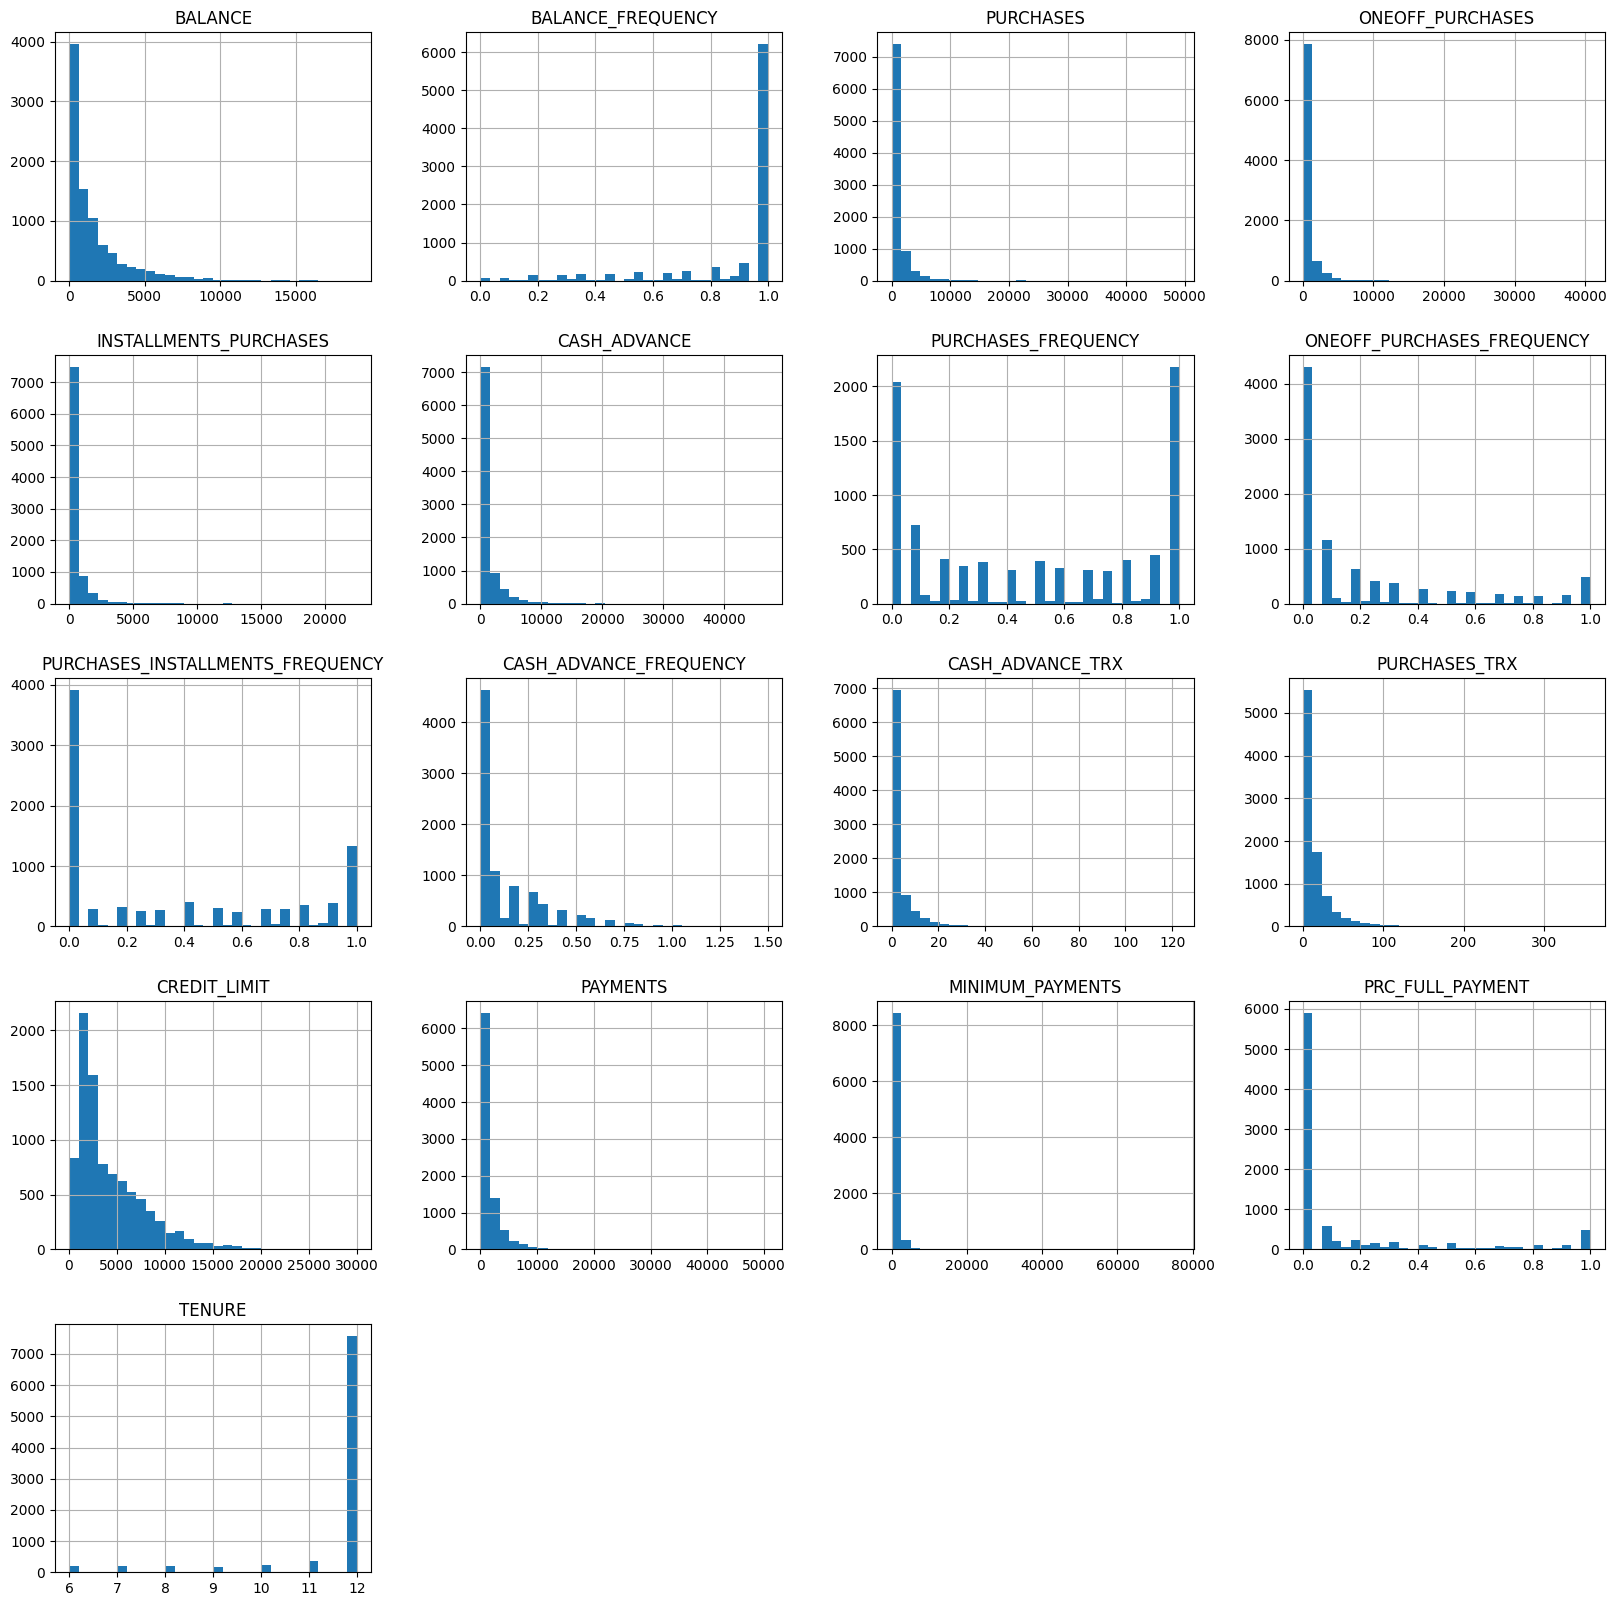

In [10]:
market_df.hist(bins=30,figsize=(20,20))

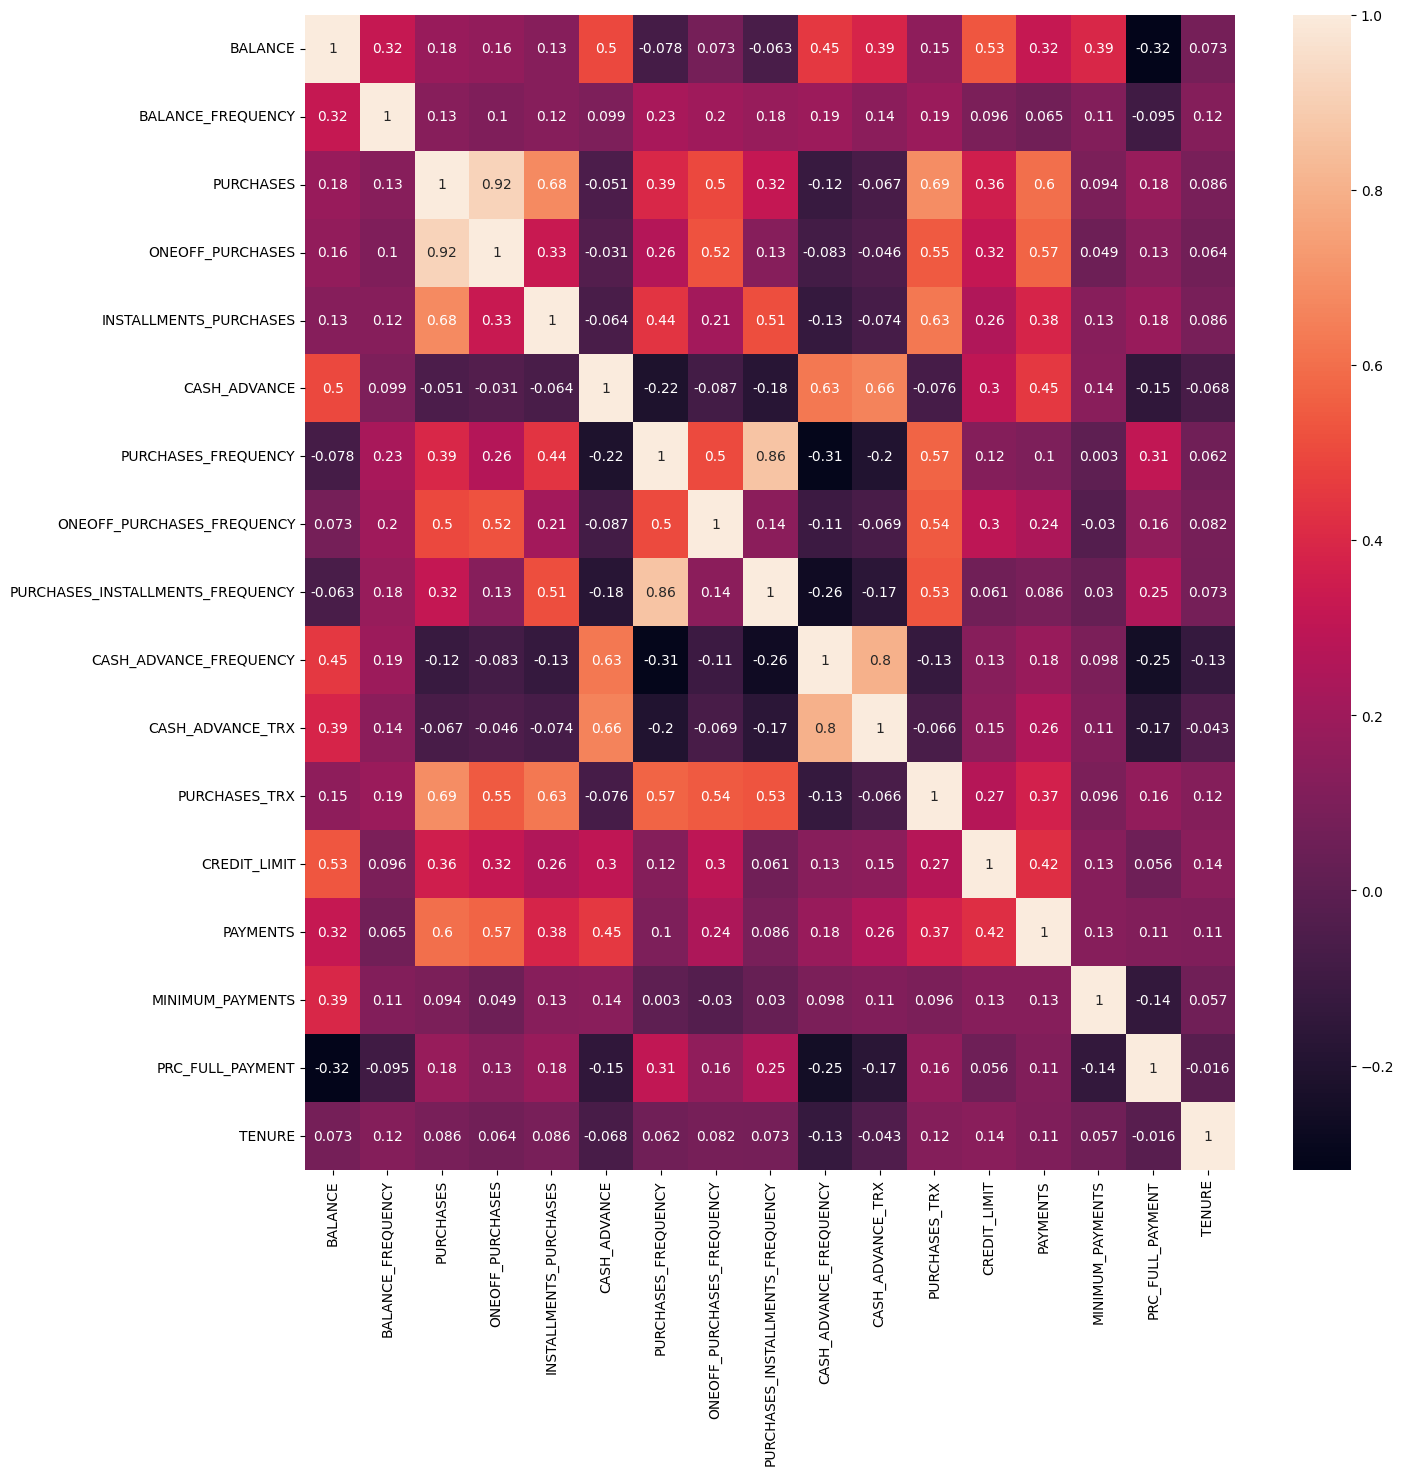

In [11]:
plt.figure(figsize=[15,15])
correlations = market_df.corr()
sns.heatmap(correlations, annot=True)
plt.show()

### 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
### Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

In [12]:
market_df['PURCHASES'].mean()

1003.2048335195531

In [13]:
# Let's see who made the max ONEOFF_PURCHASES
market_df[market_df['ONEOFF_PURCHASES'] == market_df['ONEOFF_PURCHASES'].max()]['CUST_ID']

550    C10574
Name: CUST_ID, dtype: object

In [14]:
market_df[market_df['ONEOFF_PURCHASES'] == market_df['ONEOFF_PURCHASES'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [15]:
# Let's see who made the max_PURCHASES
market_df[market_df['PURCHASES'] == market_df['PURCHASES'].max()]['CUST_ID']

550    C10574
Name: CUST_ID, dtype: object

In [16]:
market_df[market_df['PURCHASES'] == market_df['PURCHASES'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


### The customer id C10574 number 550 has the max ONEOFF_PURCHASES and PURCHASES.

In [17]:
# Let's see who made the max CASH_ADVANCE:
market_df[market_df['CASH_ADVANCE'] == market_df['CASH_ADVANCE'].max()]['CUST_ID']

2159    C12226
Name: CUST_ID, dtype: object

In [18]:
market_df[market_df['CASH_ADVANCE'] == market_df['CASH_ADVANCE'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### The customer id C12226 number 2159 has the max Cash Advance.

In [19]:
market_df.drop('CUST_ID', axis=1, inplace=True)

### distplot combines the matplotlib.hist function with seaborn kdeplot()
### KDE Plot represents the Kernel Density Estimate
### KDE is used for visualizing the Probability Density of a continuous variable. 
### KDE demonstrates the probability density at different values in a continuous variable. 

### Mean of balance is $$1500
### 'Balance_Frequency' for most customers is updated frequently ~1
### For 'PURCHASES_FREQUENCY', there are two distinct group of customers
### For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
### Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
### Credit limit average is around $4500
### Most customers are ~11 years tenure

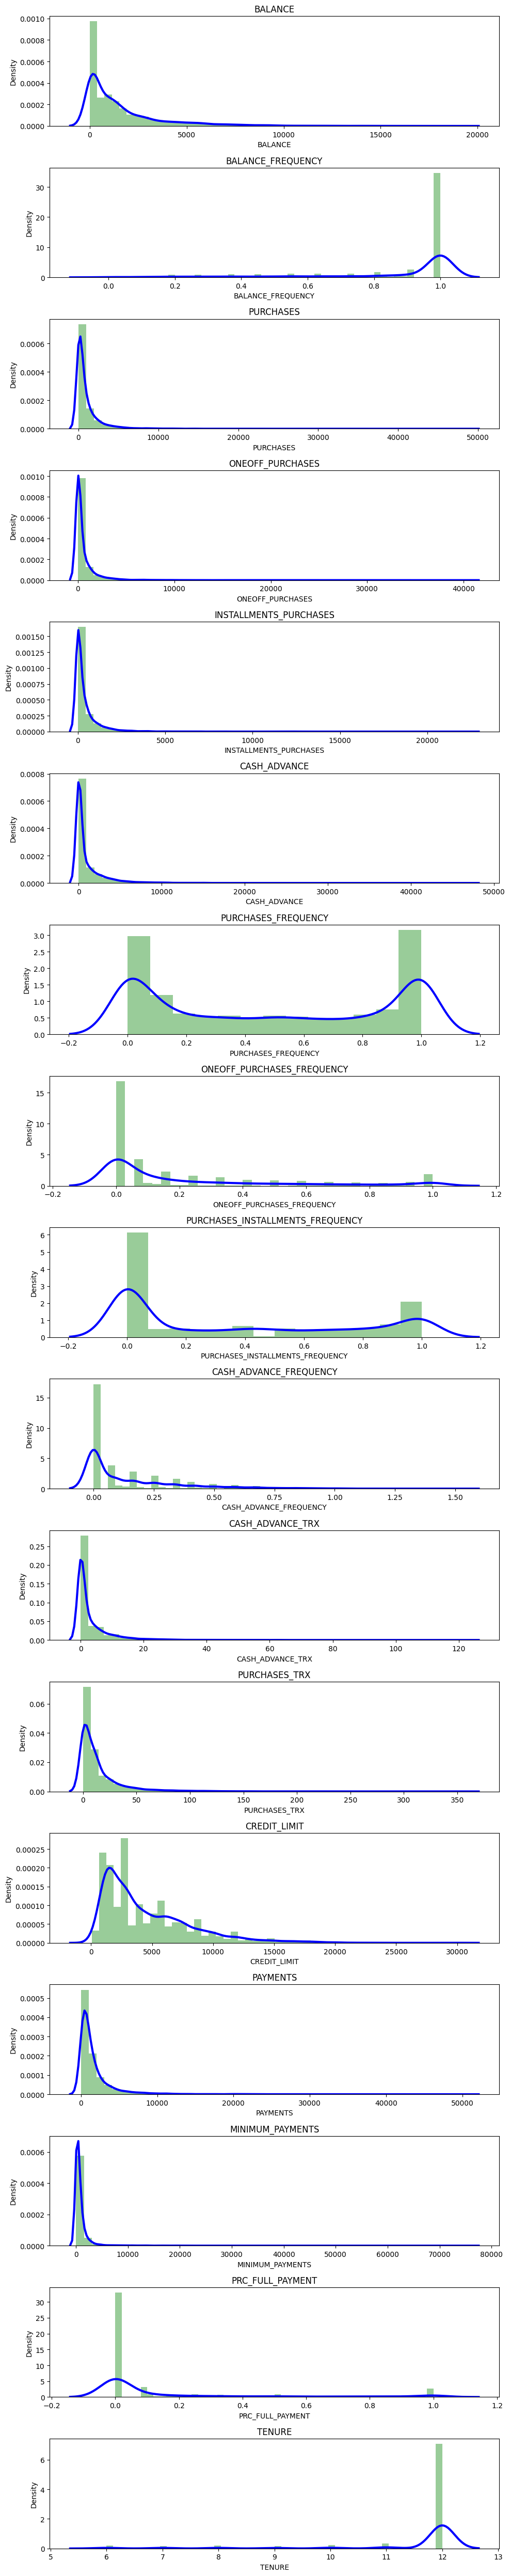

In [20]:
plt.figure(figsize =[10,50])
for i in range(len(market_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(market_df[market_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(market_df.columns[i])

plt.tight_layout()

### K-means is an unsupervised learning algorithm (clustering).
### K-means works by grouping some data points together (clustering) in an unsupervised fashion.  
### The algorithm groups observations with similar attribute values together by measuring the Euclidian distance between points.

In [21]:
# Let's scale the data
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [22]:
scaler = StandardScaler()
market_df_scaled = scaler.fit_transform(market_df)

In [23]:
market_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [24]:
market_df_scaled.shape

(8950, 17)

In [25]:
scores_1 = []

range_values = range(1,20)

for i in range_values:
    k_means = KMeans(n_clusters=i)
    k_means.fit(market_df_scaled)
    scores_1.append(k_means.inertia_)

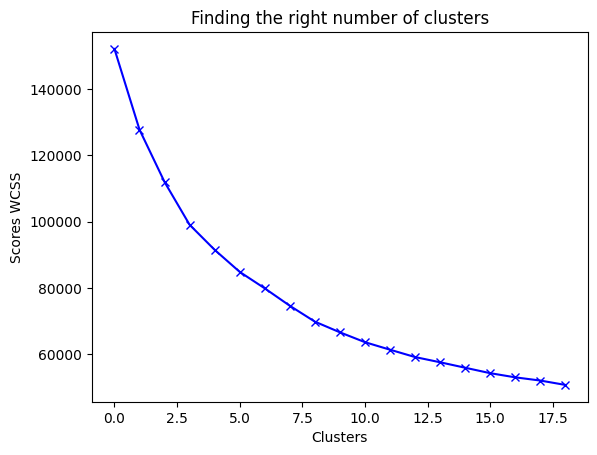

In [26]:
plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

### From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
### However, the values does not reduce linearly until 8th cluster. 
### Let's choose the number of clusters to be 7 or 8.

In [27]:
k_means = KMeans(7)
k_means.fit(market_df_scaled)
labels = k_means.labels_

In [28]:
labels

array([6, 2, 3, ..., 1, 1, 1])

In [29]:
k_means.cluster_centers_.shape

(7, 17)

In [30]:
k_means = KMeans(8)
k_means.fit(market_df_scaled)
labels = k_means.labels_
labels

array([6, 3, 1, ..., 5, 6, 6])

In [31]:
k_means.cluster_centers_.shape

(8, 17)

In [32]:
cluster_centers = pd.DataFrame(data = k_means.cluster_centers_, columns=[market_df.columns])

In [33]:
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.109761,0.468337,-0.123906,-0.295655,0.249587,-0.034556,-0.096203,-0.557801,0.140950,-0.143235,-0.039176,0.037750,-0.105359,-0.119854,9.509958,-0.520275,0.291491
1,-0.119101,0.395358,0.514961,0.638666,0.044133,-0.326488,0.953035,1.828035,0.177093,-0.400528,-0.322688,0.593181,0.419995,0.123029,-0.154788,0.393940,0.200206
2,-0.698309,-2.139961,-0.317901,-0.236622,-0.316853,-0.306256,-0.565865,-0.435073,-0.460406,-0.486581,-0.359613,-0.428097,-0.212627,-0.221846,-0.255386,0.254855,-0.153302
3,1.588326,0.375128,-0.228900,-0.161846,-0.243959,1.968207,-0.483746,-0.211832,-0.430624,1.923757,1.861930,-0.282023,0.972500,0.752332,0.348094,-0.390870,-0.093573
4,1.012874,0.464529,2.497568,1.826892,2.549187,-0.156549,1.163655,1.581560,1.268730,-0.279918,-0.148303,3.100408,1.296208,1.448723,0.359745,0.261577,0.337784
5,-0.399134,0.306267,-0.062098,-0.257131,0.325520,-0.359257,0.979441,-0.412494,1.173620,-0.460150,-0.356467,0.136056,-0.319701,-0.241624,-0.120576,0.362105,-0.026433
6,-0.015678,0.367331,-0.362880,-0.245857,-0.406258,-0.076059,-0.871497,-0.402065,-0.770210,0.147096,-0.019570,-0.490484,-0.341945,-0.267286,-0.073728,-0.454599,-0.015770
7,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409


In [34]:
labels.shape

(8950,)

In [35]:
labels.max()

7

In [36]:
labels.min()

0

In [37]:
market_df_clusters = pd.concat([market_df, pd.DataFrame({'clusters':labels})], axis=1)
market_df_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6


# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

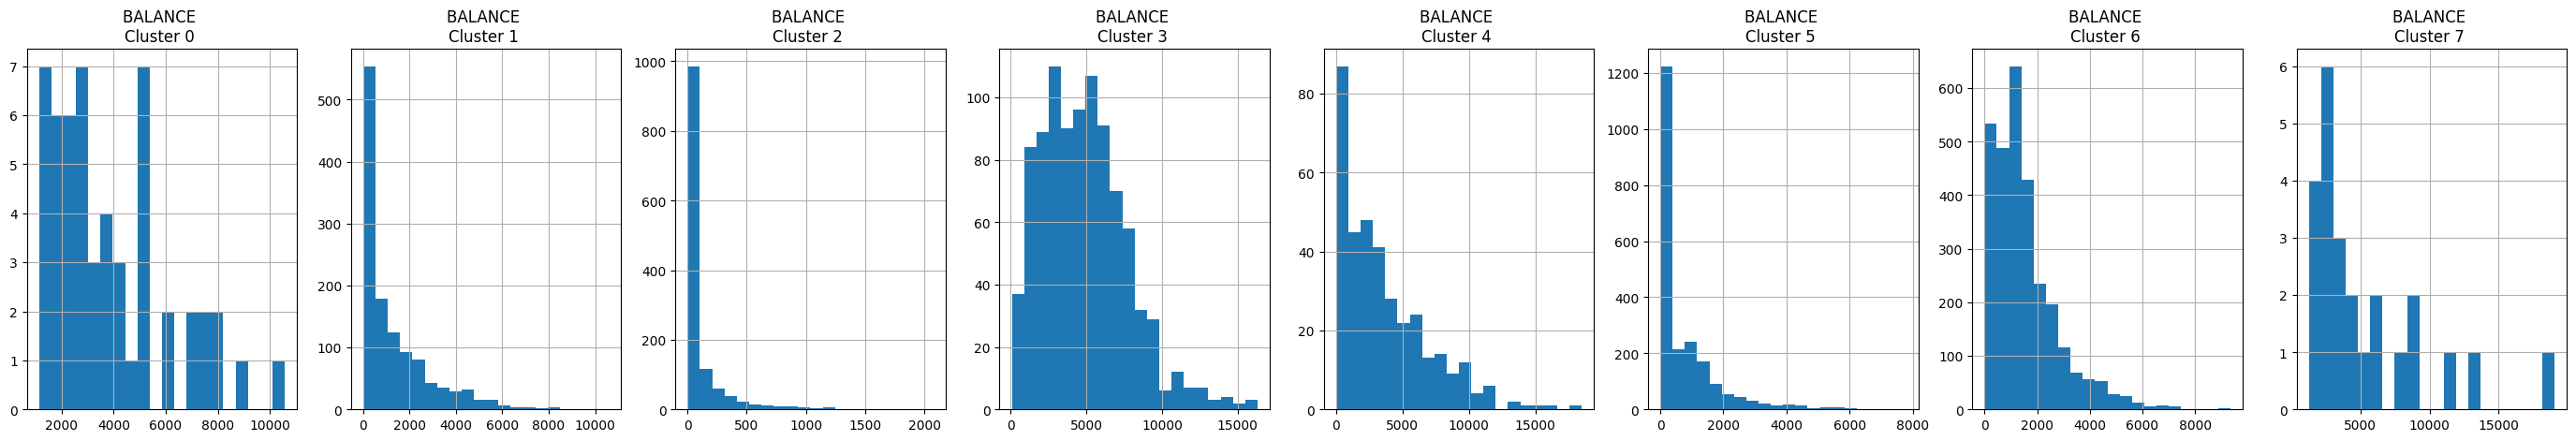

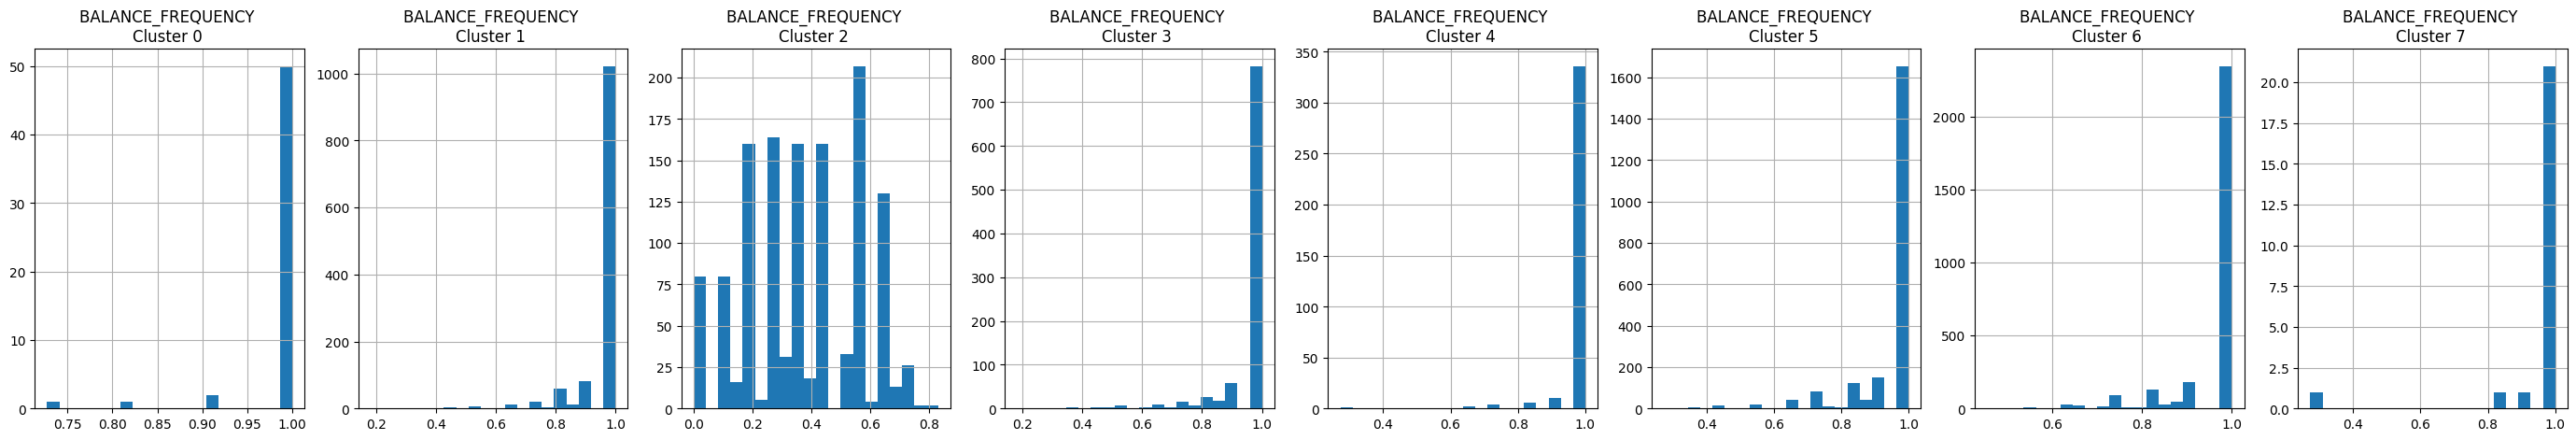

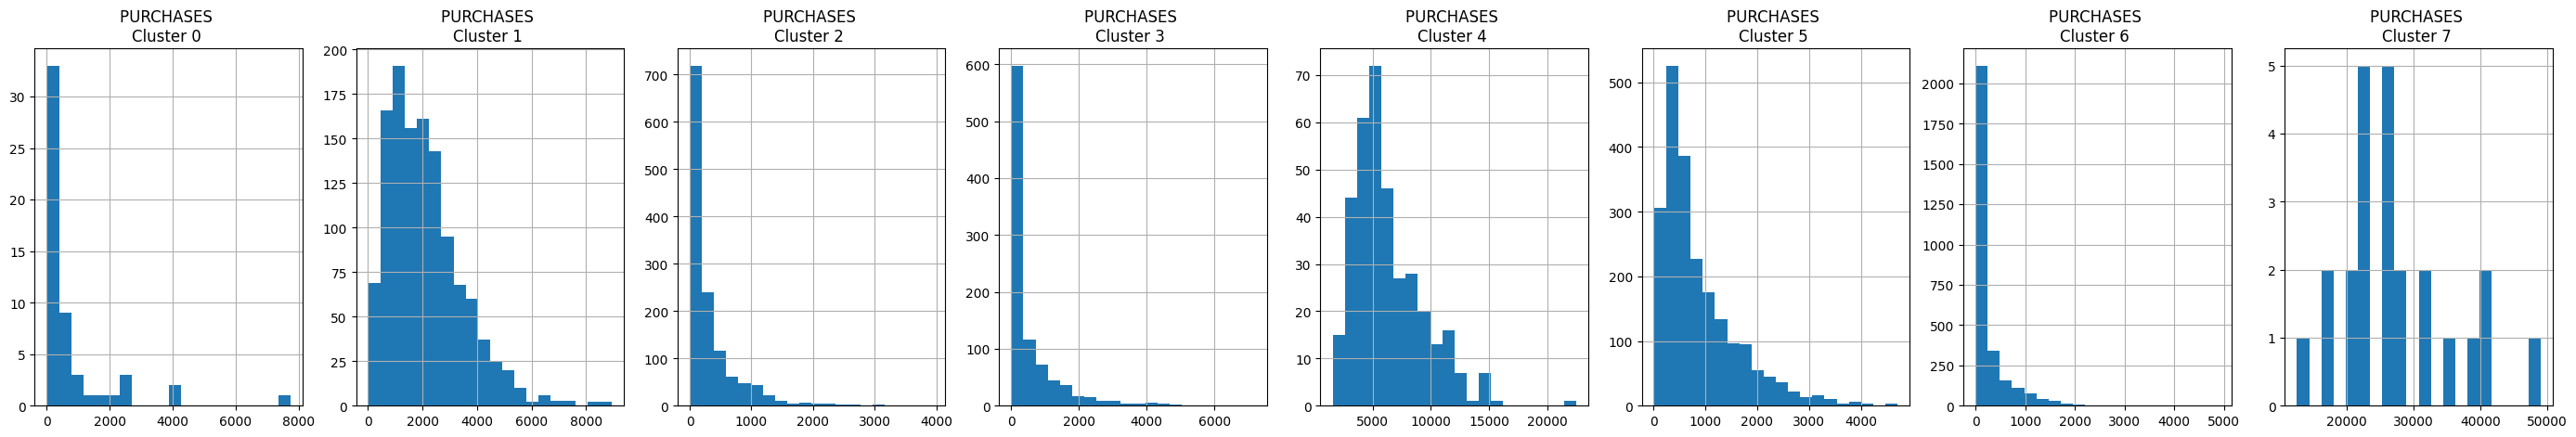

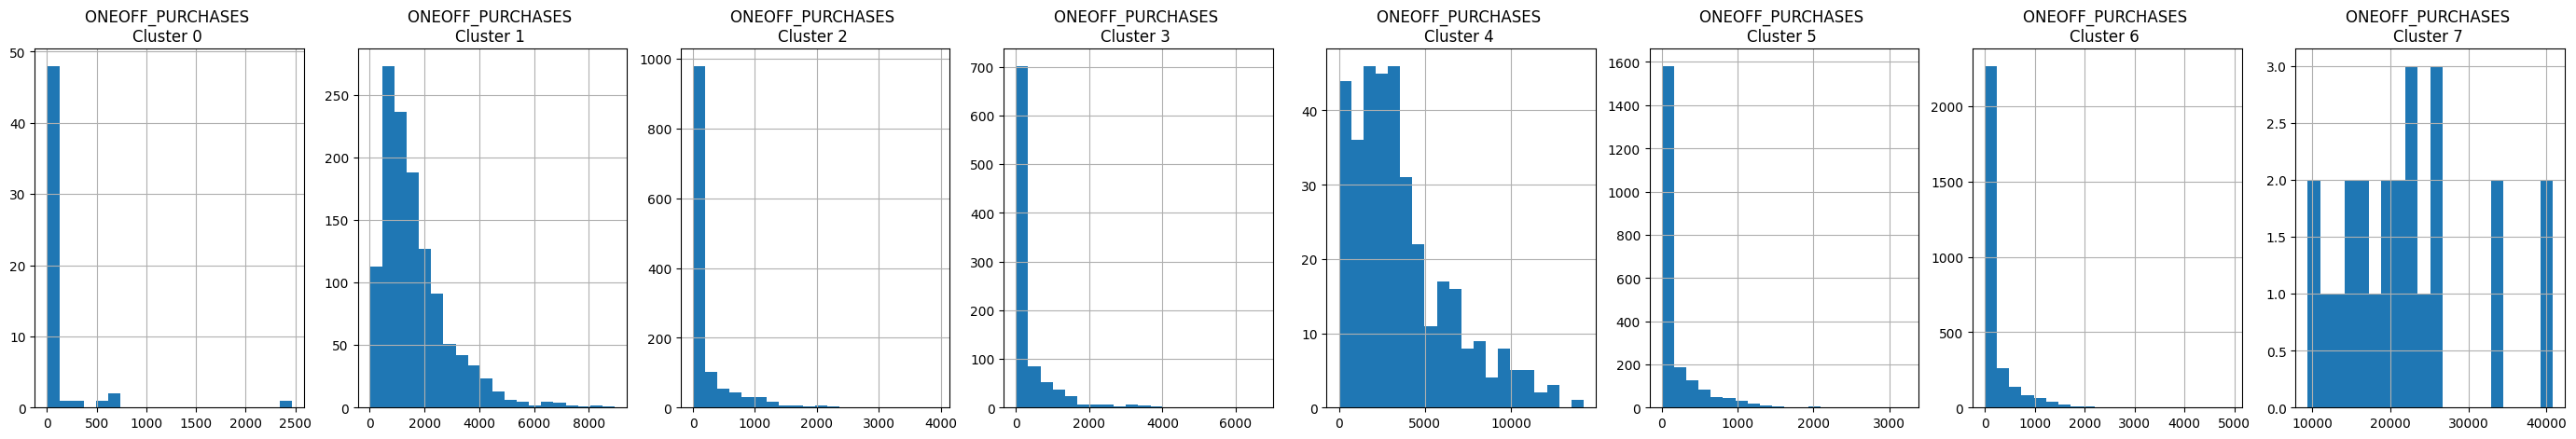

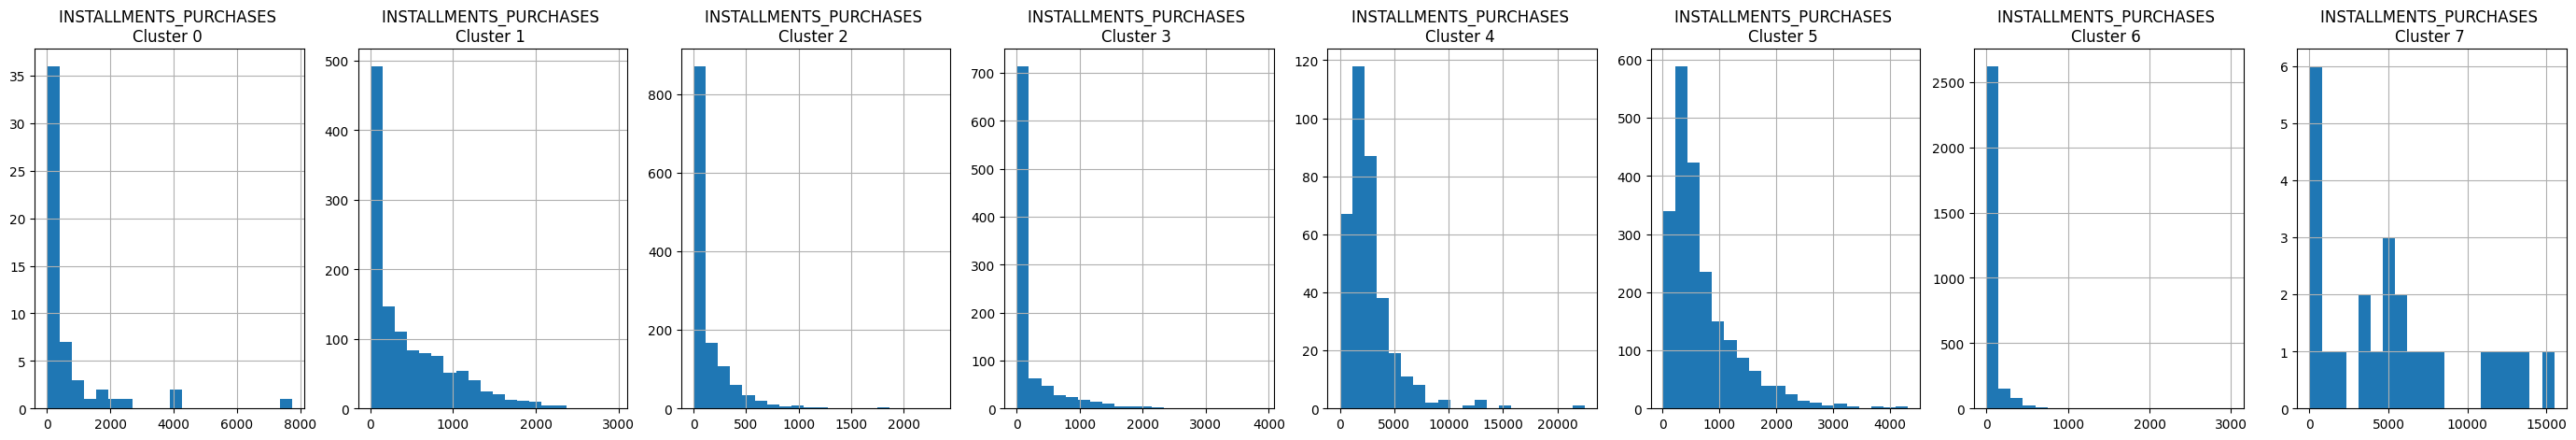

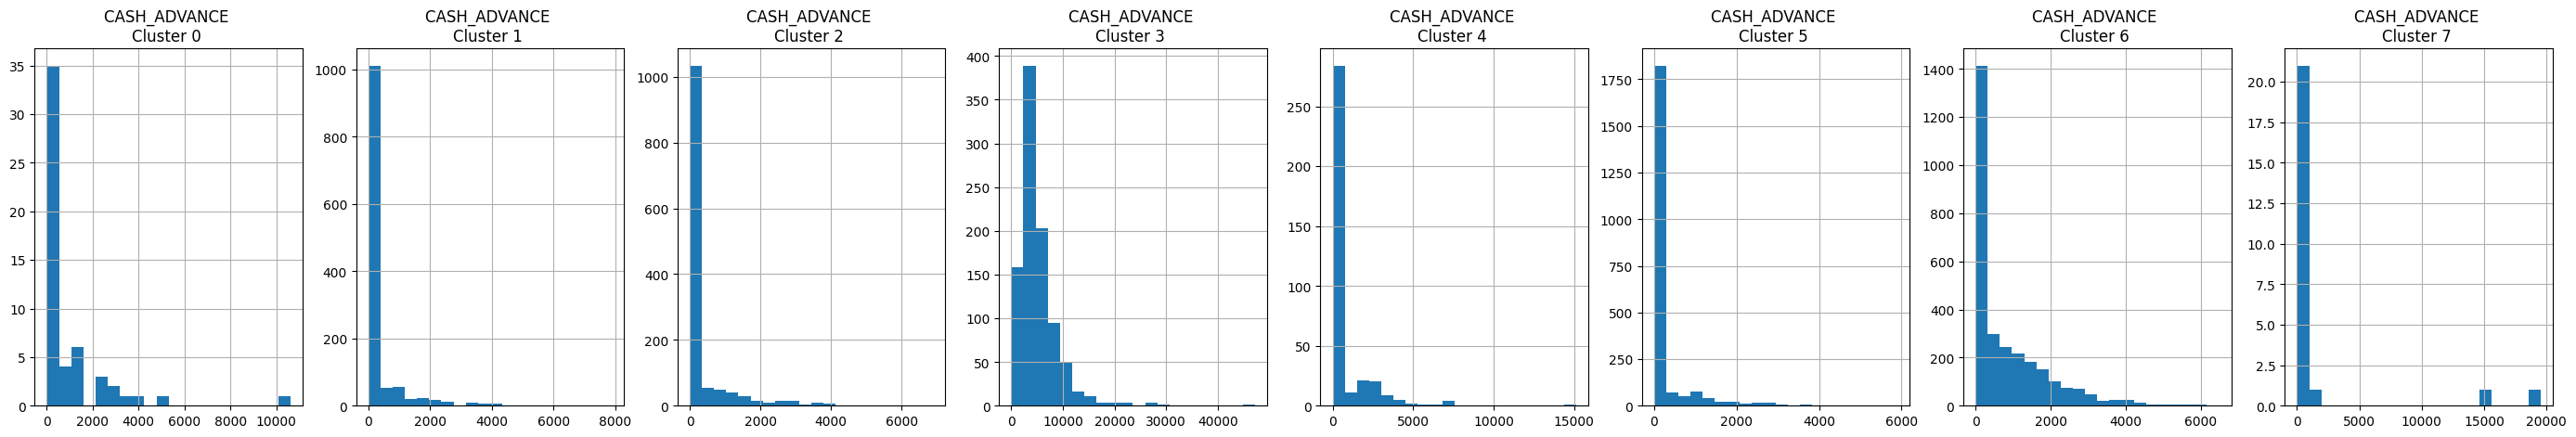

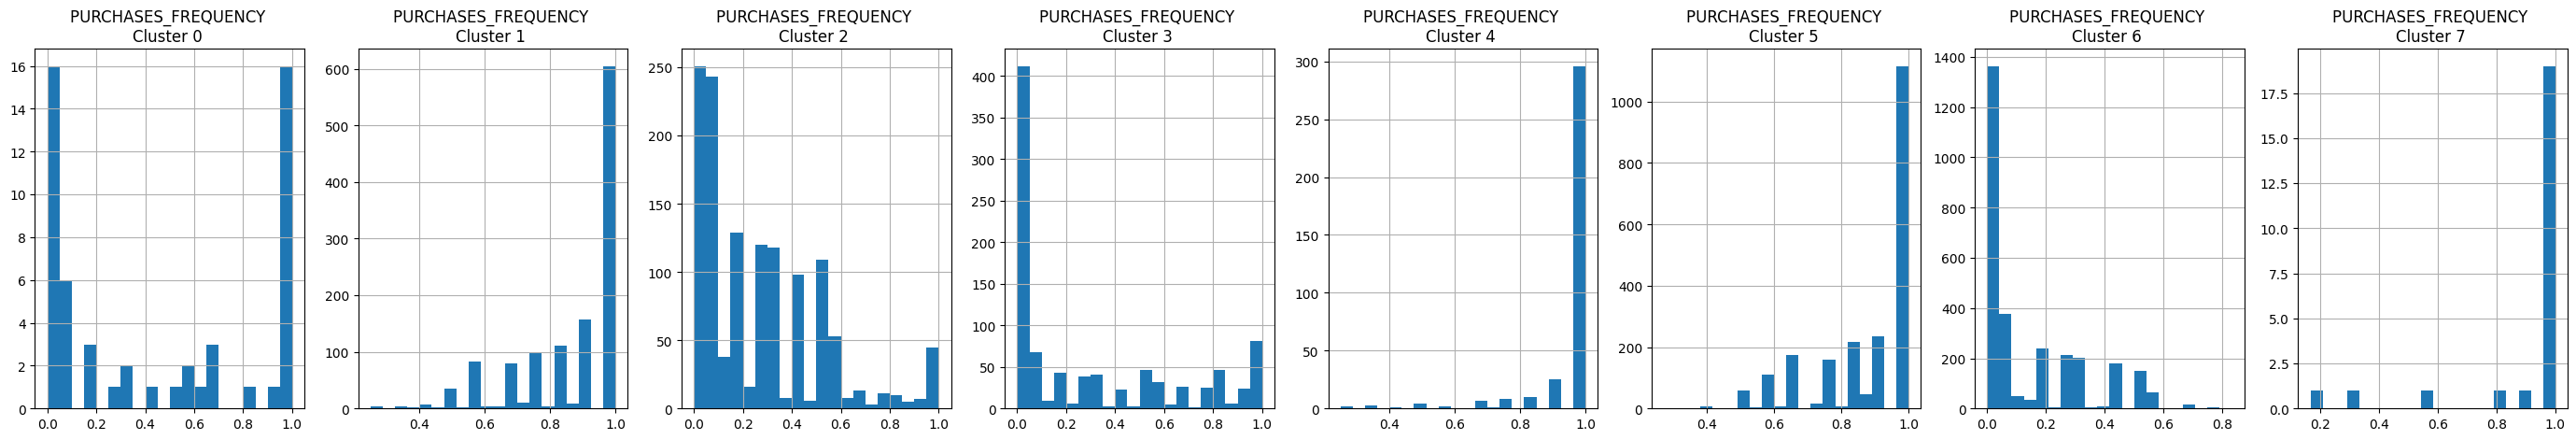

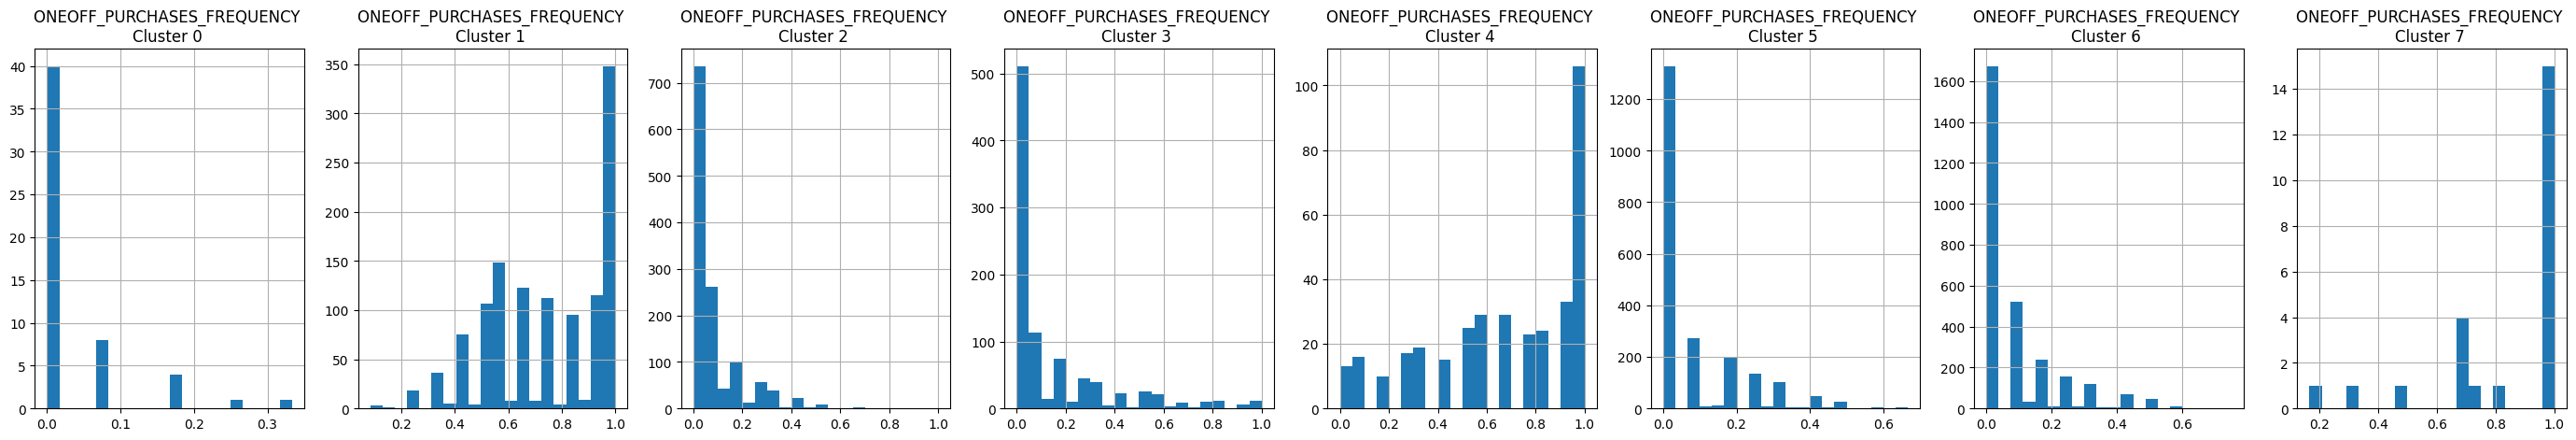

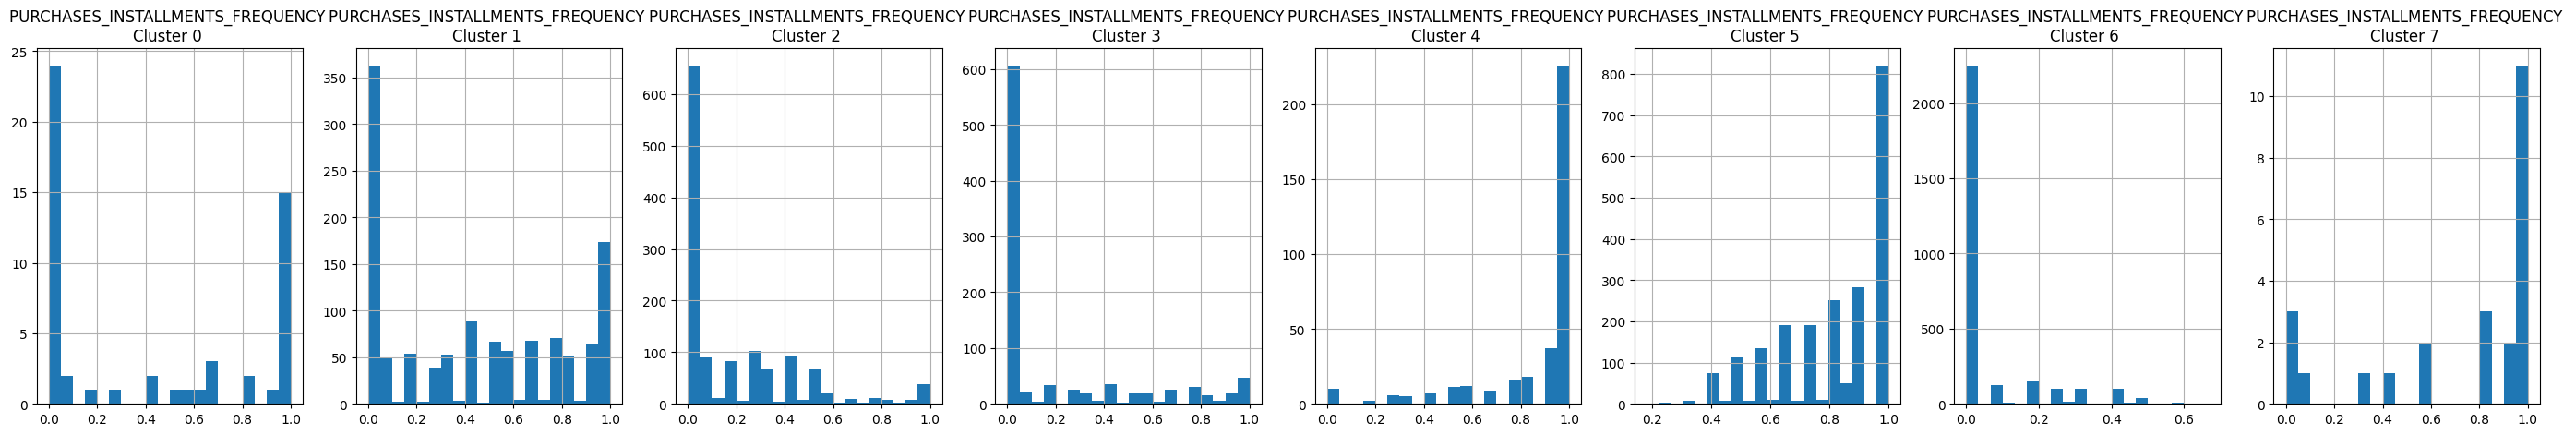

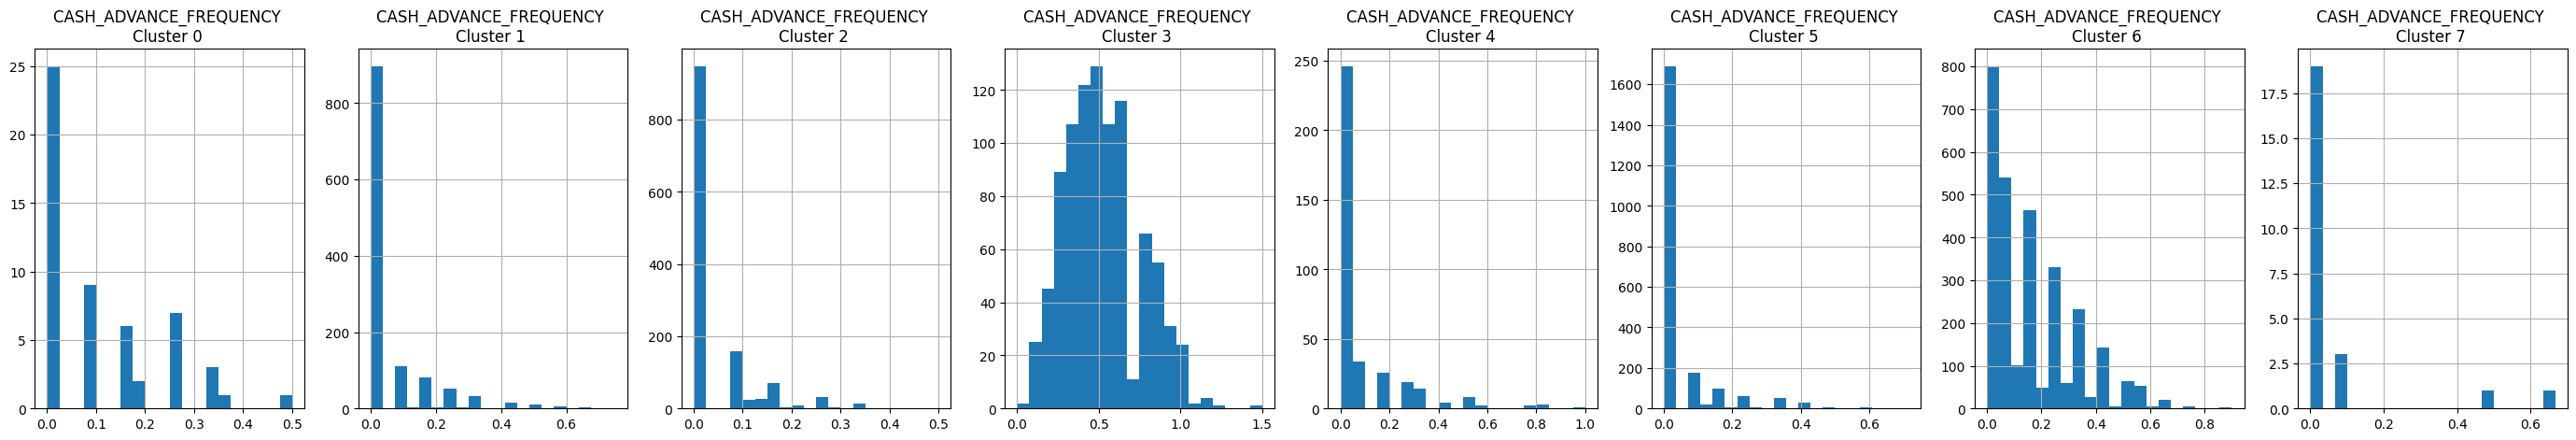

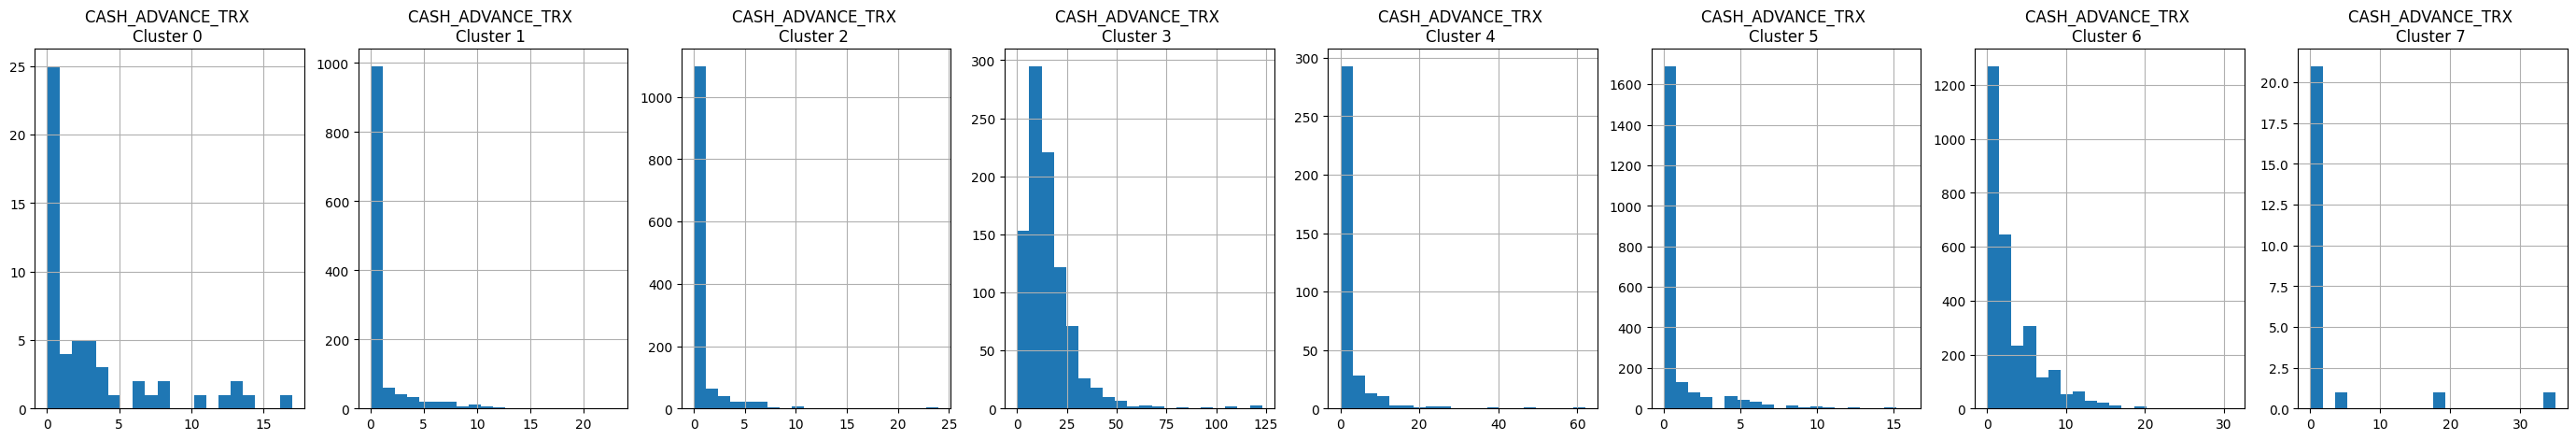

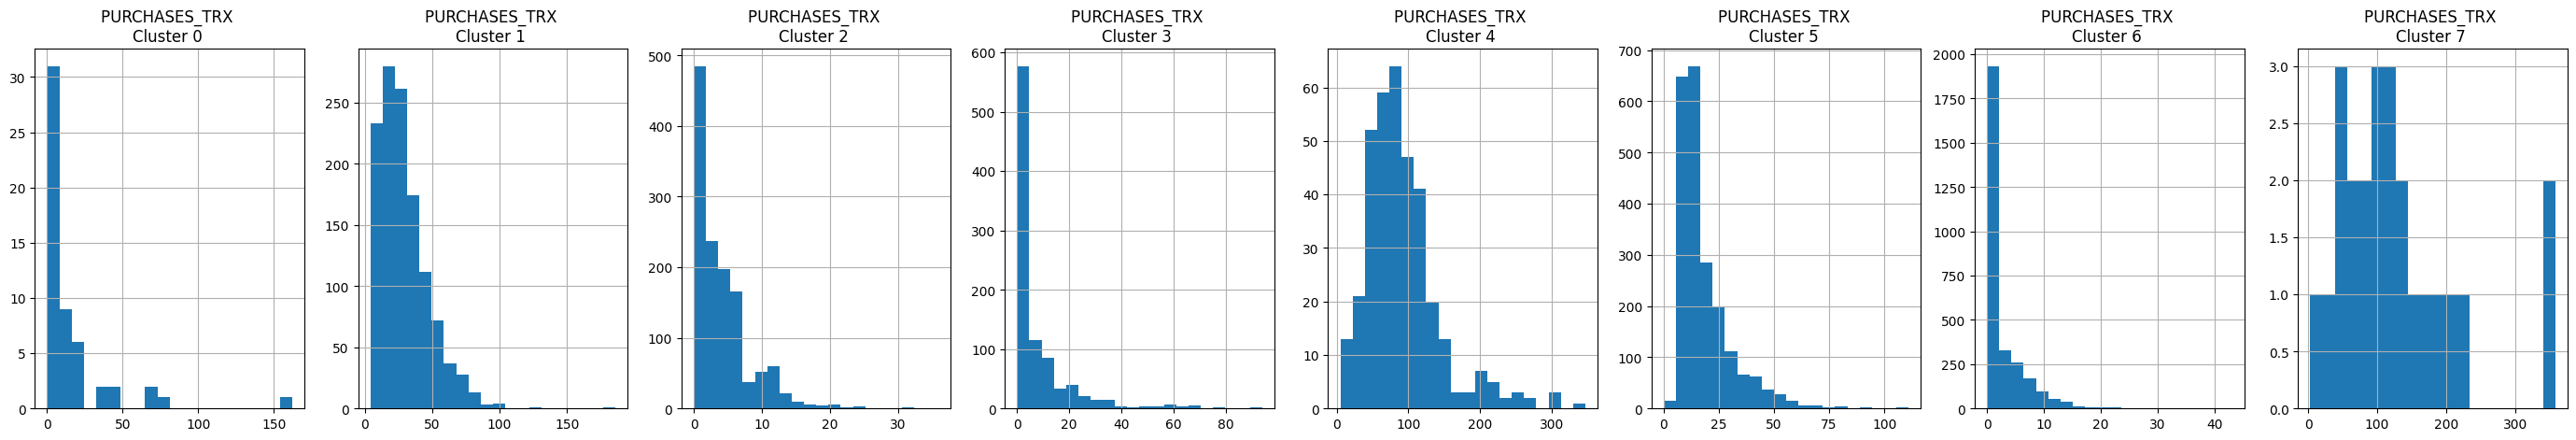

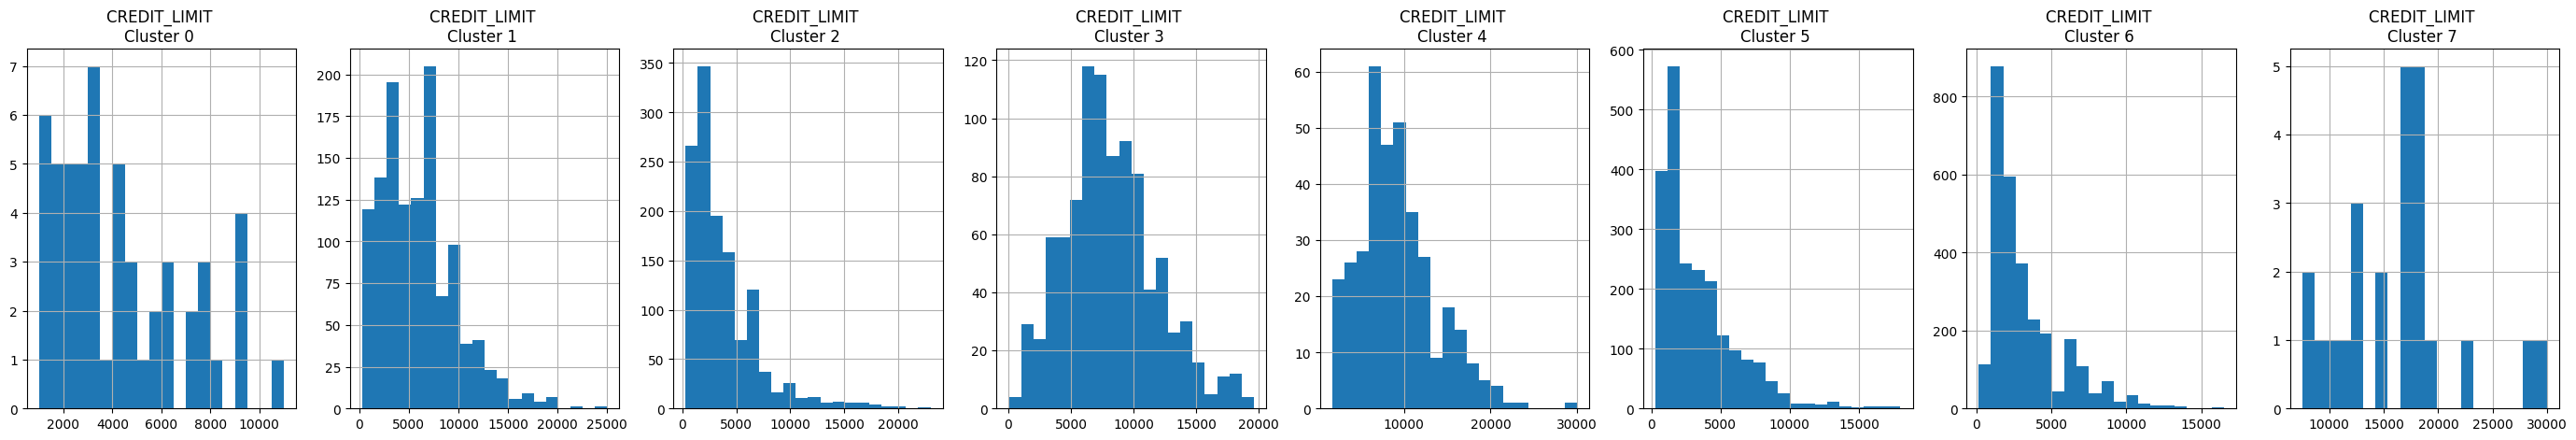

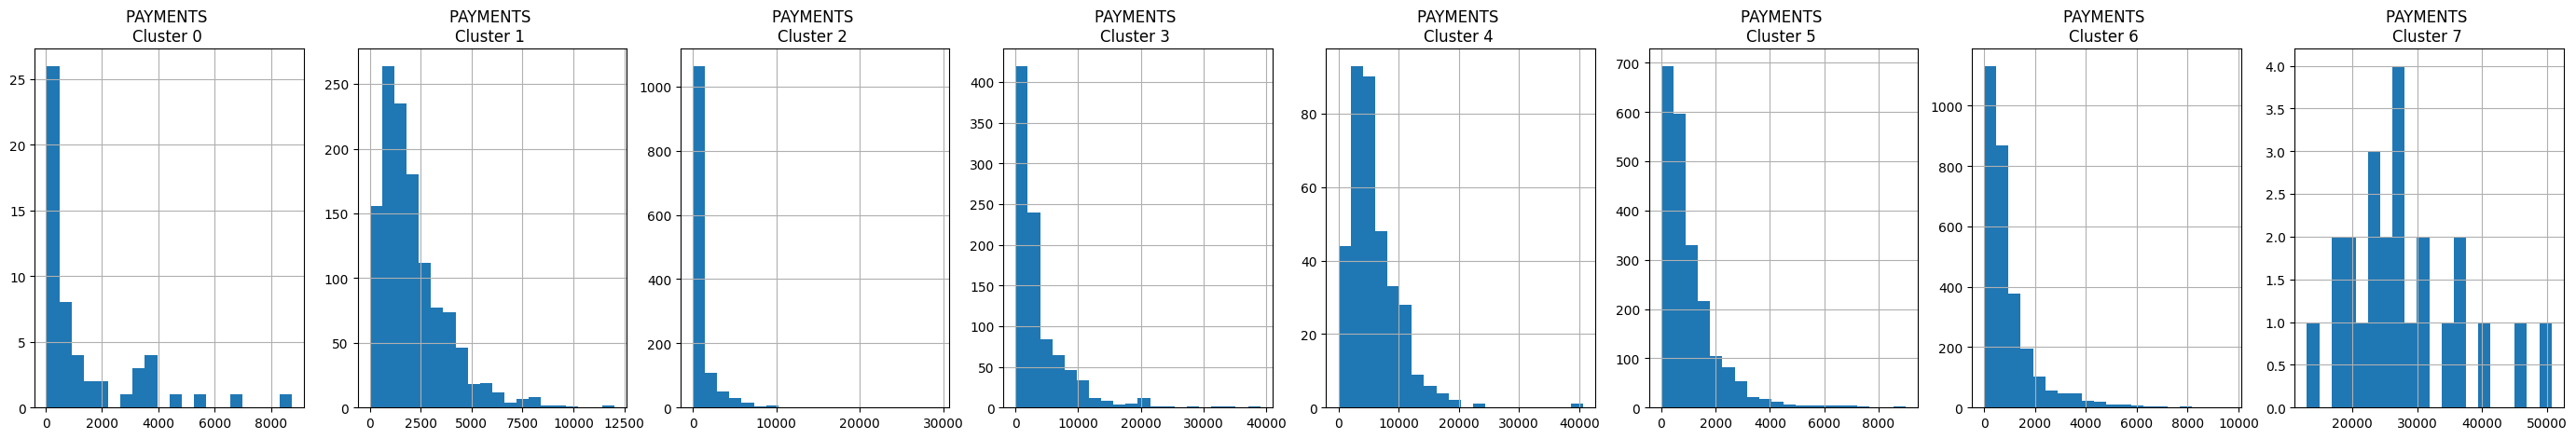

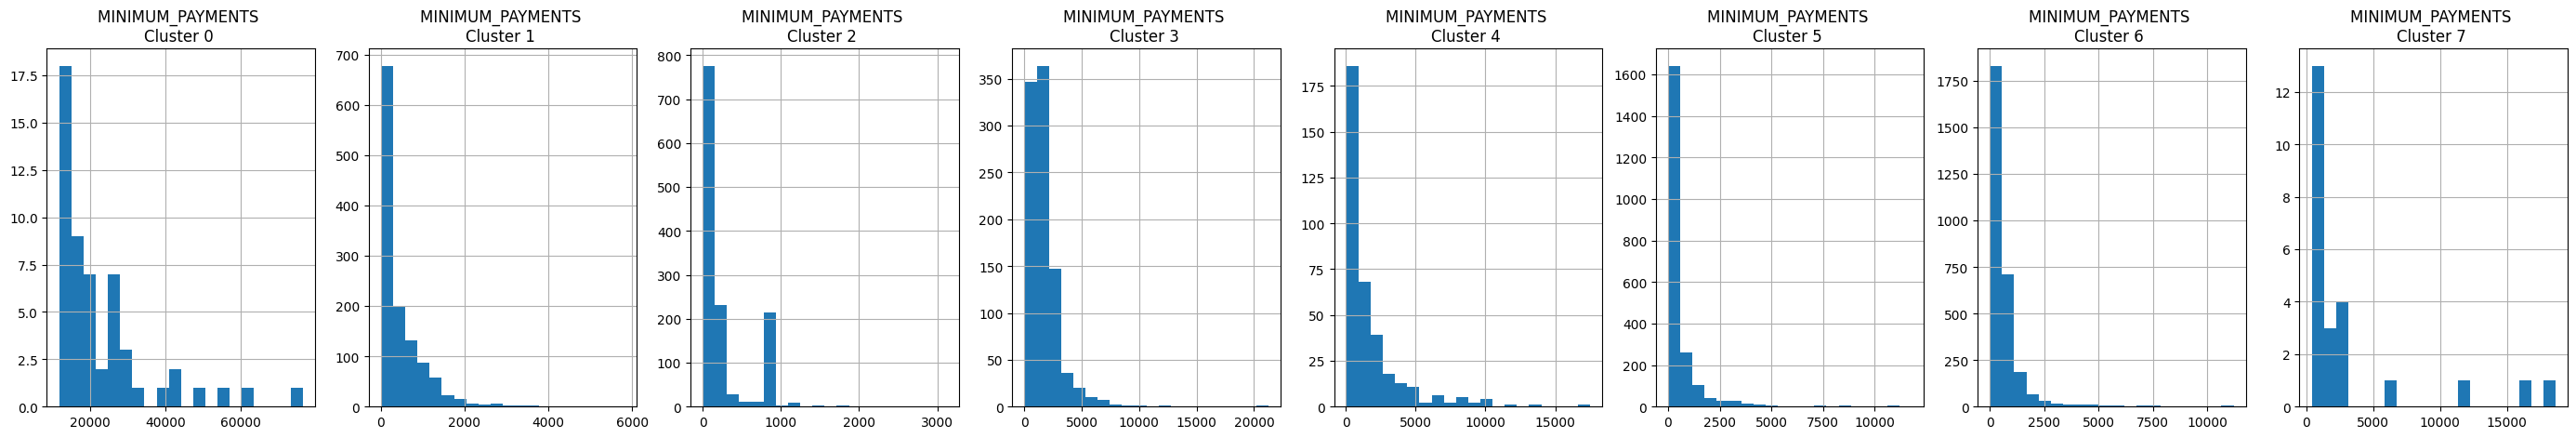

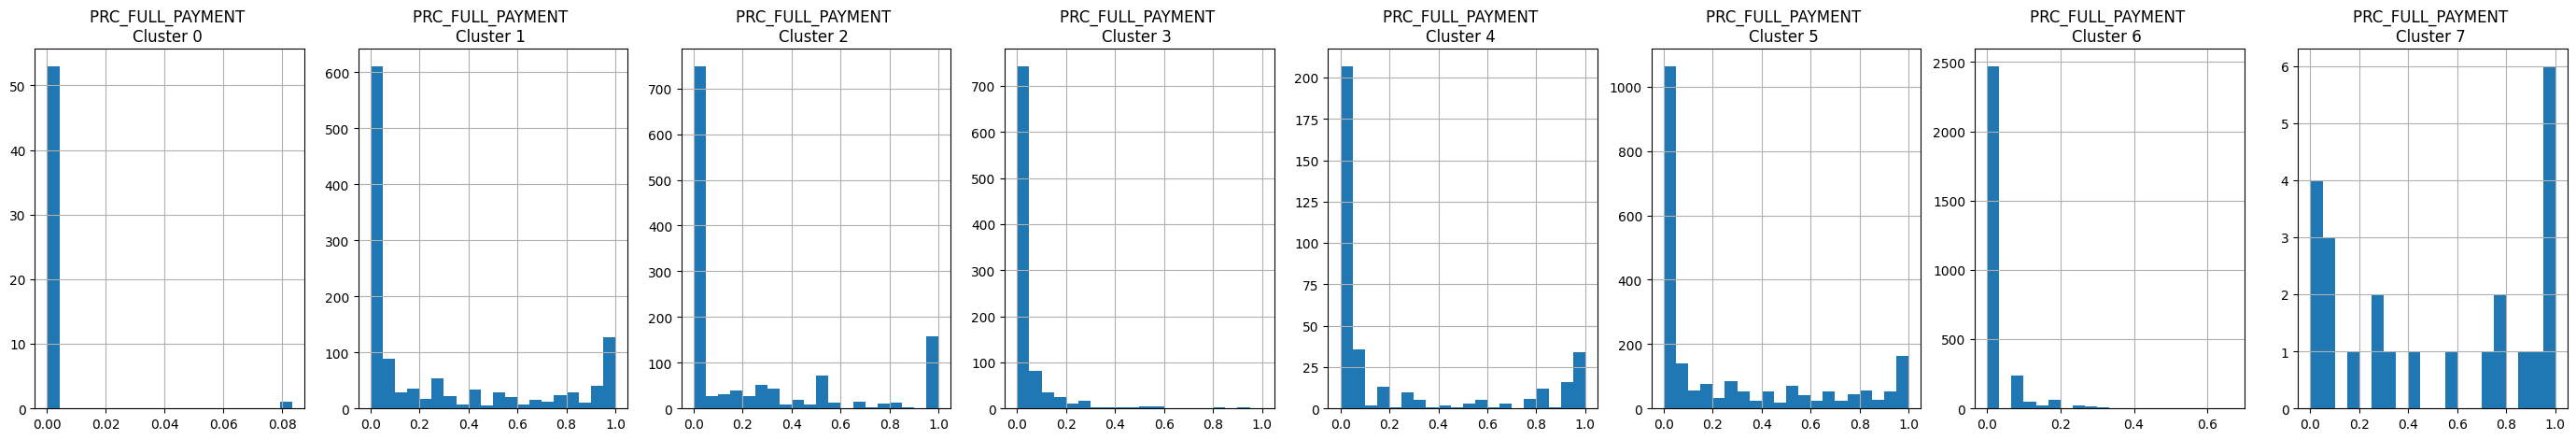

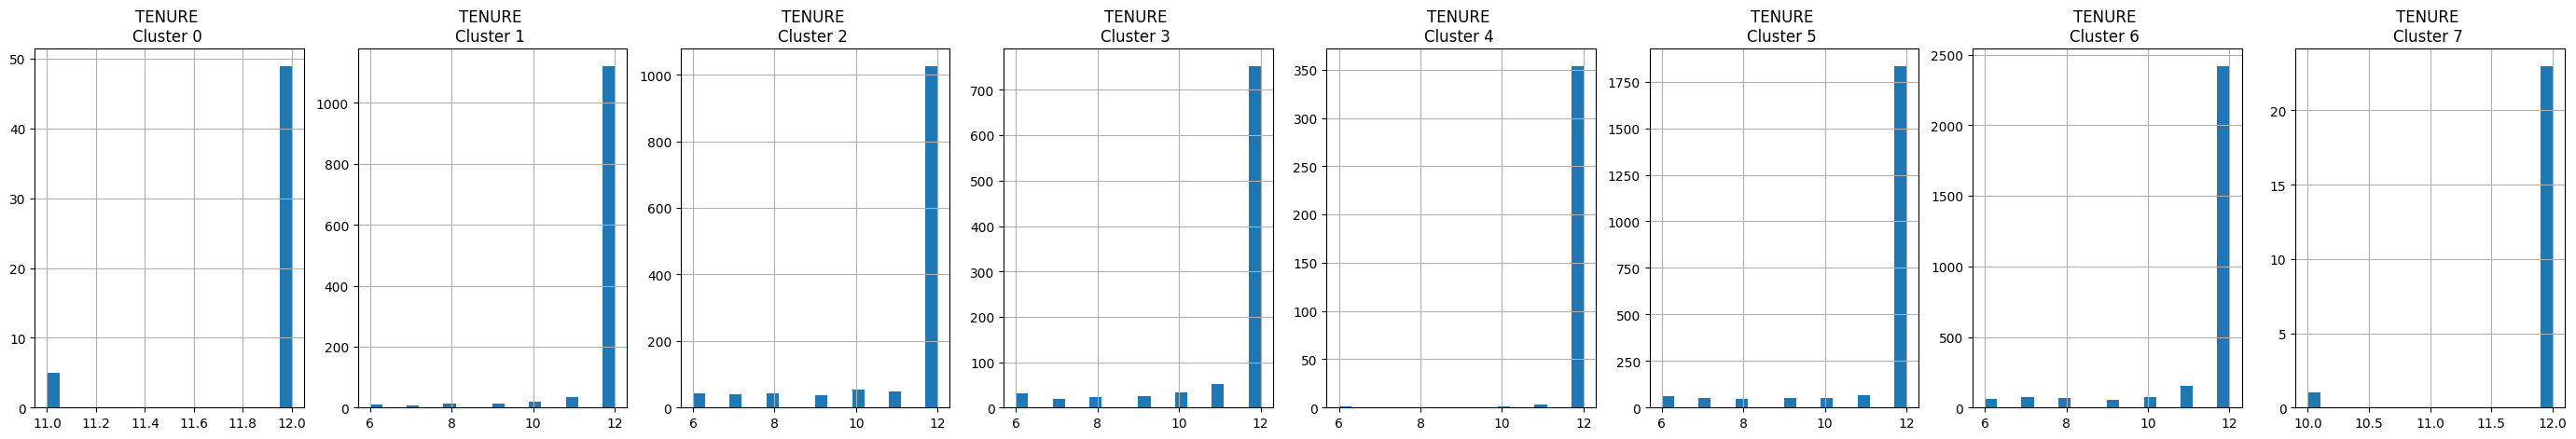

In [38]:
# Plot the histogram of various clusters
for i in market_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = market_df_clusters[market_df_clusters['clusters'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {} '.format(i,j))
  
  plt.show()

## APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [39]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(market_df_scaled)
principal_comp

array([[-1.68222082, -1.07644756],
       [-1.13829588,  2.50647793],
       [ 0.96968791, -0.38356803],
       ...,
       [-0.92620344, -1.81078836],
       [-2.33655279, -0.65794885],
       [-0.55642106, -0.40047058]])

In [40]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076448
1,-1.138296,2.506478
2,0.969688,-0.383568
3,-0.873629,0.043175
4,-1.599434,-0.688581


In [41]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076448,6
1,-1.138296,2.506478,3
2,0.969688,-0.383568,1
3,-0.873629,0.043175,6
4,-1.599434,-0.688581,6


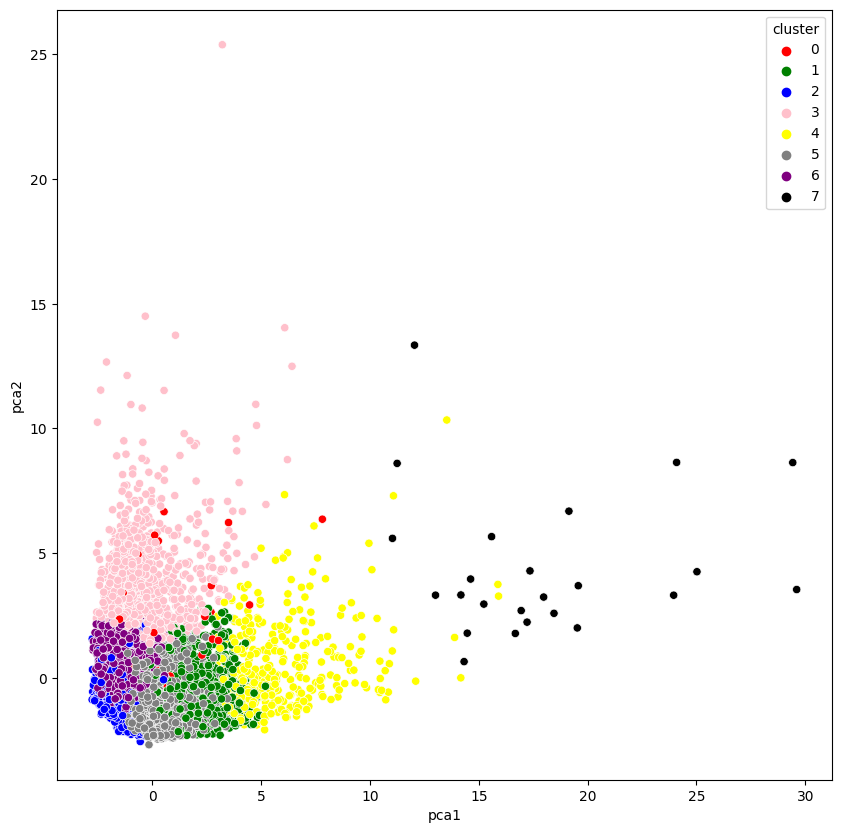

In [42]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

## APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [43]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [44]:
market_df_scaled.shape

(8950, 17)

In [45]:
autoencoder.fit(market_df_scaled, market_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 30s 381ms/step - loss: 0.4818
Epoch 2/25
70/70 [==============================] - 28s 394ms/step - loss: 0.2858
Epoch 3/25
70/70 [==============================] - 28s 403ms/step - loss: 0.2115
Epoch 4/25
70/70 [==============================] - 30s 424ms/step - loss: 0.1771
Epoch 5/25
70/70 [==============================] - 35s 496ms/step - loss: 0.1519
Epoch 6/25
70/70 [==============================] - 25s 362ms/step - loss: 0.1367
Epoch 7/25
70/70 [==============================] - 25s 360ms/step - loss: 0.1265
Epoch 8/25
70/70 [==============================] - 26s 368ms/step - loss: 0.1121
Epoch 9/25
70/70 [==============================] - 25s 358ms/step - loss: 0.1007
Epoch 10/25
70/70 [==============================] - 35s 499ms/step - loss: 0.0891
Epoch 11/25
70/70 [==============================] - 29s 416ms/step - loss: 0.0858
Epoch 12/25
70/70 [==============================] - 33s 470ms/step - loss: 0.0876
Epoch 13/25
7

In [46]:
autoencoder.save_weights('autoencoder.h5')

In [47]:
pred = encoder.predict(market_df_scaled)

280/280 [==============================] - 8s 30ms/step


In [48]:
pred.shape

(8950, 10)

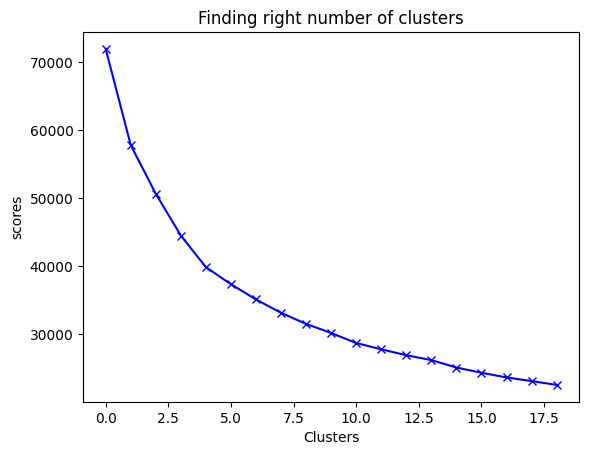

In [49]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

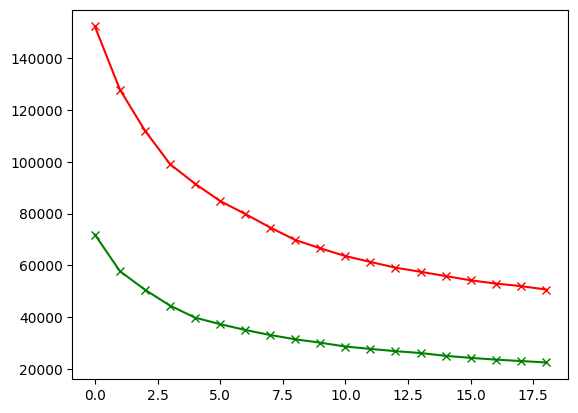

In [50]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [52]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(market_df_scaled)

In [54]:
df_cluster_dr = pd.concat([market_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [55]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.622893,-0.127994
1,0.817652,1.545039
2,-0.158236,-0.209428
3,-0.751060,-0.313675
4,-1.635289,-0.017366


In [56]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.622893,-0.127994,0
1,0.817652,1.545039,1
2,-0.158236,-0.209428,0
3,-0.751060,-0.313675,0
4,-1.635289,-0.017366,0


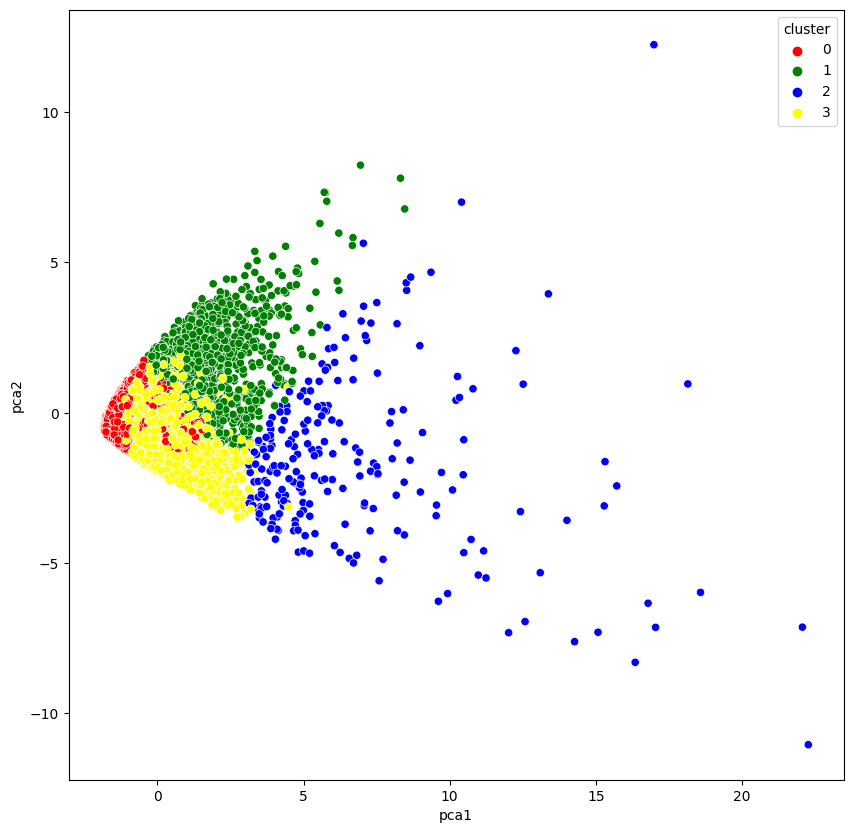

In [57]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()